In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import style
import util
import get_data, sklearn
import datetime as dt
%matplotlib inline
style.use('ggplot')

In [20]:
def plot_feature_importances(model_name, importances, feature_names, num_features=None,
                             fig_size=None, ax=None):
    features_importances = pd.DataFrame(sorted(zip(feature_names, importances),
                                           key = lambda tup: tup[1], reverse=True),
                                   columns=['features','importances'])
    data = features_importances[:num_features]
    data.plot('features','importances', kind='barh', ax=ax,
              color='blue', figsize=fig_size, legend = None)
    plt.gca().invert_yaxis() # reverse the order of features
    plt.ylabel('feature importances')
    if num_features:
        plt.title(model_name + '\nTop '+str(num_features))
    else:
        plt.title(model_name + '\nAll Features')

In [21]:
from mpl_finance import volume_overlay3
from matplotlib.dates import num2date
from matplotlib.dates import date2num
import matplotlib.mlab as mlab
import matplotlib.dates as mdates

In [22]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'size'   : 15}

matplotlib.rc('font', **font)

In [23]:
start_date = '1960-01-01'
end_date = '2010-12-31'
dates_partial = pd.date_range(start_date, end_date)

# Choose which stock to look at
stock = '^GSPC'

data_partial = get_data.get_data_csv(stock, dates_partial, redownload=False)
data_partial.dropna(inplace=True)
data_partial = util.remove_data_with_same_open_close(data_partial)

In [24]:
datanew_partial = util.calc_features_seq(data_partial, look_back=60, fee=0)
AdjClose = data_partial['Adj Close']
Volume = data_partial['Volume']
datanew_partial.dropna(inplace=True)
target_partial = datanew_partial['Change']
#adjclose = datanew['Adj Close']
features_partial = datanew_partial.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Change'], axis=1)

In [25]:
type(features_partial.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [26]:
features_partial

,Change60d,Change59d,Change58d,Change57d,Change56d,Change55d,Change54d,Change53d,Change52d,Change51d,...,Change10d,Change9d,Change8d,Change7d,Change6d,Change5d,Change4d,Change3d,Change2d,Change1d
1962-03-29,-0.824600,0.239563,-0.688873,-1.387306,-0.775192,0.043396,-0.274765,0.594559,0.345970,-0.201118,...,0.211533,-0.168869,-0.126869,-0.268166,-0.212288,-0.156006,0.071014,-0.794884,-0.271858,0.487808
1962-03-30,0.239563,-0.688873,-1.387306,-0.775192,0.043396,-0.274765,0.594559,0.345970,-0.201118,-0.575790,...,-0.168869,-0.126869,-0.268166,-0.212288,-0.156006,0.071014,-0.794884,-0.271858,0.487808,-0.042831
1962-04-02,-0.688873,-1.387306,-0.775192,0.043396,-0.274765,0.594559,0.345970,-0.201118,-0.575790,-1.085854,...,-0.126869,-0.268166,-0.212288,-0.156006,0.071014,-0.794884,-0.271858,0.487808,-0.042831,-0.657043
1962-04-03,-1.387306,-0.775192,0.043396,-0.274765,0.594559,0.345970,-0.201118,-0.575790,-1.085854,0.102463,...,-0.268166,-0.212288,-0.156006,0.071014,-0.794884,-0.271858,0.487808,-0.042831,-0.657043,-0.258804
1962-04-04,-0.775192,0.043396,-0.274765,0.594559,0.345970,-0.201118,-0.575790,-1.085854,0.102463,0.526390,...,-0.212288,-0.156006,0.071014,-0.794884,-0.271858,0.487808,-0.042831,-0.657043,-0.258804,-0.807266
1962-04-05,0.043396,-0.274765,0.594559,0.345970,-0.201118,-0.575790,-1.085854,0.102463,0.526390,0.087273,...,-0.156006,0.071014,-0.794884,-0.271858,0.487808,-0.042831,-0.657043,-0.258804,-0.807266,-0.465042
1962-04-06,-0.274765,0.594559,0.345970,-0.201118,-0.575790,-1.085854,0.102463,0.526390,0.087273,-0.755699,...,0.071014,-0.794884,-0.271858,0.487808,-0.042831,-0.657043,-0.258804,-0.807266,-0.465042,0.613235
1962-04-09,0.594559,0.345970,-0.201118,-0.575790,-1.085854,0.102463,0.526390,0.087273,-0.755699,0.161079,...,-0.794884,-0.271858,0.487808,-0.042831,-0.657043,-0.258804,-0.807266,-0.465042,0.613235,-0.101593
1962-04-10,0.345970,-0.201118,-0.575790,-1.085854,0.102463,0.526390,0.087273,-0.755699,0.161079,-0.073105,...,-0.271858,0.487808,-0.042831,-0.657043,-0.258804,-0.807266,-0.465042,0.613235,-0.101593,-0.769897
1962-04-11,-0.201118,-0.575790,-1.085854,0.102463,0.526390,0.087273,-0.755699,0.161079,-0.073105,-0.321877,...,0.487808,-0.042831,-0.657043,-0.258804,-0.807266,-0.465042,0.613235,-0.101593,-0.769897,0.365982


In [27]:
#Train-test data splits for roll-forward cross validation
from sklearn import preprocessing
features_scaled = pd.DataFrame(preprocessing.scale(features_partial))
from sklearn.model_selection import train_test_split
from LSTM_layers import LSTM_keras
X_train, X_test, y_train, y_test = train_test_split(features_scaled.values, target_partial, shuffle = False, test_size=0.2)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm = LSTM_keras(input_shape = (X_train.shape[1], 1), nodes = [50, 50, 50], l2 = 0.001)
history = lstm.train(X_train, y_train, val_portion = 0.2, n_epochs = 10, n_batch = 80)

Train on 7798 samples, validate on 1950 samples
Epoch 1/10
7798/7798 [==============================] - 15s 2ms/step - loss: 0.7632 - acc: 0.5155 - val_loss: 0.7095 - val_acc: 0.5385
Epoch 2/10
7798/7798 [==============================] - 13s 2ms/step - loss: 0.6995 - acc: 0.5230 - val_loss: 0.6921 - val_acc: 0.5385
Epoch 3/10
7798/7798 [==============================] - 13s 2ms/step - loss: 0.6929 - acc: 0.5230 - val_loss: 0.6908 - val_acc: 0.5385
Epoch 4/10
7798/7798 [==============================] - 13s 2ms/step - loss: 0.6924 - acc: 0.5230 - val_loss: 0.6907 - val_acc: 0.5385
Epoch 5/10
7798/7798 [==============================] - 13s 2ms/step - loss: 0.6923 - acc: 0.5230 - val_loss: 0.6907 - val_acc: 0.5385
Epoch 6/10
7798/7798 [==============================] - 13s 2ms/step - loss: 0.6923 - acc: 0.5230 - val_loss: 0.6907 - val_acc: 0.5385
Epoch 7/10
7798/7798 [==============================] - 13s 2ms/step - loss: 0.6923 - acc: 0.5230 - val_loss: 0.6907 - val_acc: 0.5385
Epoch 8

In [28]:
model = lstm.clf
filename = 'saved_model.sav'
import pickle
pickle.dump(model, open(filename,'wb'))

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
model_trained = pickle.load(open(filename,'rb'))
lstm.clf = model_trained
pred = lstm.predict(X_test)

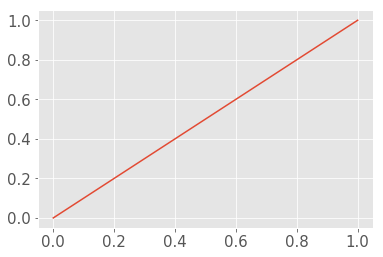

0.5

In [31]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
metrics.auc(fpr, tpr)

In [32]:
# credit: Hye Joo Han
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root_mean_squared_error ($)')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label='Validation Loss')
    plt.legend()

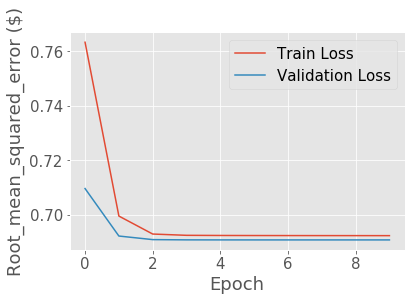

In [33]:
plot_history(history)

In [35]:
test_data = data_partial.iloc[int(X_train.shape[0]*0.8) + 1:int(X_train.shape[0])+1]

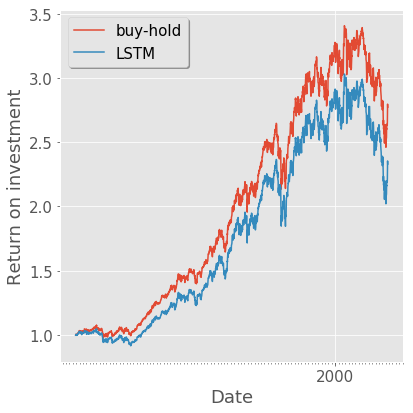

2.3303732587449457

In [36]:
util.gain_plot_from_test_data(test_data, pred, fee=10, model_name = "LSTM")